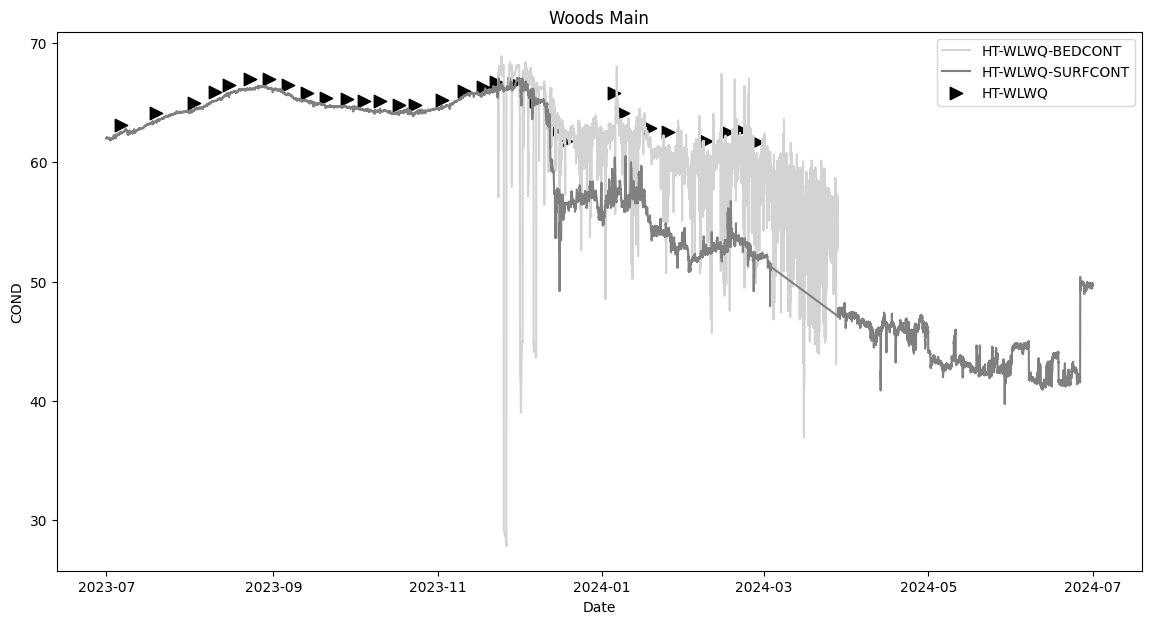

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data and header CSV files
ht_wlwq_data_df = pd.read_csv('../../../data-warehouse/csv/ht/wlwq/WoodsLakeMiddle_SpecificConductivity_profile_Data.csv')
ht_wlwq_header_df = pd.read_csv('../../../data-warehouse/csv/ht/wlwq/WoodsLakeMiddle_SpecificConductivity_profile_Header.csv')

ht_wlwq_cont_data_df = pd.read_csv('../../../data-warehouse/csv/ht/wlwq/WoodsLakeMiddleLakeBedContinuous_SpecificConductivity_profile_Data.csv')
ht_wlwq_cont_header_df = pd.read_csv('../../../data-warehouse/csv/ht/wlwq/WoodsLakeMiddleLakeBedContinuous_SpecificConductivity_profile_Header.csv')

ht_wlwq_surfcont_data_df = pd.read_csv('../../../data-warehouse/csv/ht/wlwq/WoodsLakeMiddleSurfaceContinuous_SpecificConductivity_profile_Data.csv')
ht_wlwq_surfcont_header_df = pd.read_csv('../../../data-warehouse/csv/ht/wlwq/WoodsLakeMiddleSurfaceContinuous_SpecificConductivity_profile_Header.csv')

# Convert the 'Date' column to datetime
ht_wlwq_data_df['Date'] = pd.to_datetime(ht_wlwq_data_df['Date'])
ht_wlwq_cont_data_df['Date'] = pd.to_datetime(ht_wlwq_cont_data_df['Date'])
ht_wlwq_surfcont_data_df['Date'] = pd.to_datetime(ht_wlwq_surfcont_data_df['Date'])

# Set the 'Header' column as the index for the header DataFrame
ht_wlwq_header_df.set_index('Header', inplace=True)
ht_wlwq_cont_header_df.set_index('Header', inplace=True)
ht_wlwq_surfcont_header_df.set_index('Header', inplace=True)

# Plotting
plt.figure(figsize=(14, 7))
start_date = '2023-07-01'
end_date = '2024-07-01'
ht_wlwq_data_df_filtered = ht_wlwq_data_df[(ht_wlwq_data_df['Date'] >= start_date) & (ht_wlwq_data_df['Date'] <= end_date)]
ht_wlwq_cont_data_df_filtered = ht_wlwq_cont_data_df[(ht_wlwq_cont_data_df['Date'] >= start_date) & (ht_wlwq_cont_data_df['Date'] <= end_date)]
ht_wlwq_surfcont_data_df_filtered = ht_wlwq_surfcont_data_df[(ht_wlwq_surfcont_data_df['Date'] >= start_date) & (ht_wlwq_surfcont_data_df['Date'] <= end_date)]

plt.plot(ht_wlwq_cont_data_df_filtered['Date'], ht_wlwq_cont_data_df_filtered['Data'],color='lightgrey',label=ht_wlwq_cont_header_df.at['Tag', 'Value'])

plt.plot(ht_wlwq_surfcont_data_df_filtered['Date'], ht_wlwq_surfcont_data_df_filtered['Data'], label=ht_wlwq_surfcont_header_df.at['Tag', 'Value'], color='grey')

plt.scatter(ht_wlwq_data_df_filtered['Date'], ht_wlwq_data_df_filtered['Data'], label=ht_wlwq_header_df.at['Tag', 'Value'], color='black',marker='>',s=80)

plt.xlabel('Date')
plt.ylabel('COND')
plt.title('Woods Main')
plt.legend()
plt.show()



In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress



for file in files:
    # Read the data
    data = pd.read_csv(file, encoding='unicode_escape')

    # Convert the 'Date' column to datetime
    data['Date'] = pd.to_datetime(data['Date'])

    # Filter the dataframes to include only the data from 2015 to 2024
    start_date = pd.to_datetime('2023-01-01')
    end_date = pd.to_datetime('2024-07-01')

    data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

    # Calculate summary statistics
    mean_data = data['Data'].mean()
    median_data = data['Data'].median()
    q1_data = data['Data'].quantile(0.25)
    q3_data = data['Data'].quantile(0.75)

    # # Convert dates to numerical format for linear regression
    # data['Date_ordinal'] = data['Date'].apply(lambda date: date.toordinal())

    # # Perform linear regression
    # slope, intercept, r_value, p_value, std_err = linregress(data['Date_ordinal'], data['Data'])

    # # Create trendline
    # trendline = slope * data['Date_ordinal'] + intercept

    plt.figure(figsize=(14, 7))

    # Plot quartile 1 and quartile 3 as an area plot
    plt.fill_between(data['Date'], q1_data, q3_data, color='grey', alpha=0.3, label='Interquartile Range (IQR)')

    # Plot the raw data
    plt.scatter(data['Date'], data['Data'], label='Data', color='black', marker='+')

    # # Plot the trendline
    # plt.plot(data['Date'], trendline, color='blue', linestyle='-', linewidth=2, label='Trendline')

    # Plot mean and median
    plt.axhline(y=mean_data, color='red', label=f'Mean: {mean_data:.4f}')
    plt.axhline(y=median_data, color='green', label=f'Median: {median_data:.4f}')

    # Set x-axis limits
    #plt.xlim([min(data['Date']), max(data['Date'])])
    plt.xlim(start_date,end_date)

    # Enhancing the plot
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Data', fontsize=14)
    plt.title(f'{os.path.basename(file).replace("_profile_Data.csv", "")} Over Time', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(loc='lower right')
    plt.tight_layout()

    # # Display trendline equation and R^2 value on the plot
    # equation_text = f'Trendline: y = {slope:.4e}x + {intercept:.4f}\n$R^2$ = {r_value**2:.4f}'
    # plt.gcf().text(0.62, 0.18, equation_text, fontsize=10, verticalalignment='top')

    # Save the plot as a PNG file
    filename = os.path.basename(file)
    filename = os.path.splitext(filename)[0]
    filename = filename.replace('_profile_Data', '')

    output_file = os.path.join(output_folder, f'{filename}.png')
    plt.savefig(output_file, format='png')

    plt.show()
